# Unit 1 - Modelling and Representations of Systems
# Part 3 - State Space Representation

- Modelling of electrical and mechanical systems
    - Electric circuits with resistors, capacitors, inductors, op-amps
    - Translational mechanical systems
    - Rotational mechanical systems
- Simulation of a system
    - Response due to initial conditions
    - Step response
    - Response to any input
- Representations
    - State-Space equations
- Key Concept
    - Poles (eigenvalues!)
    - Zeros

Required viewing before this lecture
- video series on state space representation

Sections in textbook:
- 2.4, 2.5, 9.2, 9.3


# State Space

Large, multi-equation systems start to become tedious to put into transfer function form (requires substituting equations into each other). This can make the transfer function error-prone. 

The state space representation offers a nice alternative.

The main idea is to reduce high-order differential equations into an equivalent set of first order differential equations. 

The state-space equations have the following form:
$$
\begin{align*}
\frac{\text{d}x(t)}{\text{dt}} &= Ax(t) + Bu(t), \\
y(t) &= C x(t) + D u(t),
\end{align*}
$$
where $A$, $B$, $C$, $D$ are constant matrices, and $x$ is called the state vector. 

Any linear system can be written in state-space form. It is just another representation of a system. 

Advantages of State-Space:
- Multi-input, multi-output systems are much easier to handle! This is the advent of "Modern" control! Enables the possibility to control more complicated systems.
- Easier to combine multiple differential equations into one expression (don't need to substitute equations into each other)
- Can use linear algebra to find useful properties of the system (such as the poles)
- high-order differential equations are reduced to first order differential equations, so writing down solutions is easier.

Rudolf Kalman was one of the founders of modern control theory, establishing the state-space framework.
![Rudolf Kalman](Rudolf-E-Kálmán.jpg "Rudolf Kalman")

source: https://www.gainesville.com/story/news/2009/10/08/obama-honors-former-uf-professor-with-science-medal/31724964007/

# Using State Space to Represent a Circuit

![Electric Circuit](circuit.png "Electric Circuit")

# In Class Activity!

Obtain a model for the circuit using state-space representation. Let $v_{in}$ be the input and $i_{L}$ be the output. 

For the state vector, use:
$$
\begin{align*}
x(t) = \begin{bmatrix} v_c(t) \\ i_L(t) \end{bmatrix},
\end{align*}
$$
where $v_c$ is the voltage across the capacitor, and $i_L$ is the current through the inductor. 


I will use the following notation:
Current through $R_1$ is denoted $i_{R_1}$, and voltage across $R$ is denoted $v_{R_1}$. Same notation for all other elements. For notational clarity, I will drop the argument $t$, but keep in mind that all currents and voltages are actually functions of time. 

By looking at the node between $R_1$ and $R_2$ we can write:
$$
\begin{align*}
i_{R_1} + i_{C} &= i_{R_2} \\
\frac{v_C}{R_1} + C \frac{dv_c}{dt} &= i_L \\
\frac{dv_c}{dt} &= \frac{1}{C}i_L - \frac{1}{RC_1}v_c
\end{align*}
$$

Now look at bottom loop:
$$
\begin{align*}
-v_{in} + v_c + v_{R_2} + v_L &= 0 \\
-v_{in} + v_c + i_L R_2 + L \frac{d i_L}{dt} &= 0 \\
\frac{d i_L}{dt} &= \frac{1}{L}v_{in} - \frac{1}{L}v_c - \frac{R_2}{L} i_L
\end{align*}
$$

We have two first order differential equations that contain only the state variables, so we are ready to write the two equations in matrix form. 
$$
\begin{align*}
\frac{dx}{dt} &= \begin{bmatrix} \frac{dv_c}{dt} \\ \frac{di_L}{dt} \end{bmatrix} \\
&= \begin{bmatrix} \frac{1}{C}i_L - \frac{1}{RC_1}v_c \\ \frac{1}{L}v_{in} - \frac{1}{L}v_c - \frac{R_2}{L} i_L \end{bmatrix} \\
&= \begin{bmatrix} -\frac{1}{R_1C} & \frac{1}{C} \\ -\frac{1}{L} & -\frac{R_2}{L} \end{bmatrix} \begin{bmatrix} v_c \\ i_L \end{bmatrix} + \begin{bmatrix} 0 \\ \frac{1}{L} \end{bmatrix} v_{in}
\end{align*}
$$

The output can also be expressed in terms of the state variables and input:
$$
\begin{align*}
y &= i_L \\
&= \begin{bmatrix} 0 & 1 \end{bmatrix} + 0 v_{in}
\end{align*}
$$

Thus, we have:
$$
\begin{align*}
A &= \begin{bmatrix} -\frac{1}{R_1C} & \frac{1}{C} \\ -\frac{1}{L} & -\frac{R_2}{L} \end{bmatrix} \\
B &= \begin{bmatrix} 0 \\ \frac{1}{L} \end{bmatrix} \\
C &= \begin{bmatrix} 0 & 1 \end{bmatrix} \\
D &= 0
\end{align*}
$$

# Look at another system

![2 Disk Graphic Diagram](2diskGraphic.png "2 Disk Graphic Diagram")

A torque is applied by a motor to a system with two disks. The disks are connected by a thin flexible rod. The rod is supported by bearings on both sides of the disks. The torque applied by the motor is known. The angular position of the right disk is measured. 

We will:
- Obtain governing differential equations,
- Construct the frequency response using the physical system,
- Derive and analyze a state-space representation


# Schematic Diagram
![2 Disk Schematic Diagram](2diskSchematic.png "2 Disk Schematic Diagram")

# In Class Activity! 
Draw a free body diagram for each disk that shows all the torques affecting the disk.
- Let $\theta_1$ be the position of disk 1, and let $\theta_2$ be the position of disk 2.
- For the spring torque, split it into two components, one component related to each position ($\theta_1$ and $\theta_2$).

# Free Body Diagram
![2 Disk Free Body Diagram](2diskFreeBody.png "2 Disk Free Body Diagram")

# In class activity!

Derive the governing differential equations for each disk. You should end up with two differential equations, one for each disk.

Two masses, so two equations:
$$ 
\begin{align*}
\sum_i T_i = J_1 \frac{\text{d}^2 \theta_1}{\text{dt}^2} \hspace{1cm} \text{and} \hspace{1cm} \sum_i T_i = J_2 \frac{\text{d}^2 \theta_2}{\text{dt}^2} 
\end{align*}
$$

First mass:
$$
\begin{align*}
T_M-T_{B_1} - T_{s}&= J_1 \frac{\text{d}^2 \theta_1}{\text{dt}^2} \\
T_M - b_1 \frac{\text{d}\theta_1}{\text{dt}} - k( \theta_1 - \theta_2 ) &= J_1 \frac{\text{d}^2 \theta_1}{\text{dt}^2} \\
J_1 \frac{\text{d}^2 \theta_1}{\text{dt}^2} + b_1 \frac{\text{d}\theta_1}{\text{dt}} + k\theta_1 - k\theta_2 - T_M &= 0
\end{align*}
$$

Second mass:
$$
\begin{align*}
T_{s} - T_{B_2} &= J_2 \frac{\text{d}^2 \theta_2}{\text{dt}^2} \\
k( \theta_1 - \theta_2 ) - b_2 \frac{\text{d}\theta_2}{\text{dt}} -  &= J_2 \frac{\text{d}^2 \theta_2}{\text{dt}^2} \\
J_2 \frac{\text{d}^2 \theta_2}{\text{dt}^2} + b_2 \frac{\text{d}\theta_2}{\text{dt}} - k\theta_1 + k\theta_2 &= 0
\end{align*}
$$

# In Class Activity!

Using the two equations, find the transfer function from motor torque, $T_M$, to the angle of the second disk, $\theta_2$. You can assume that the system is initially at rest (i.e. initial conditions are zero).

Hint: this will require you to substitute one of the equations into the other. 

We are interested in the relationship between $T_M$ and $\theta_2$. So, substitute expression for second mass into expression for first mass:
$$
\begin{align*}
\frac{J_1J_2}{k}\frac{\text{d}^4\theta_2}{\text{dt}^4} + \frac{J_1b + J_2b}{k}\frac{\text{d}^3\theta_2}{\text{dt}^3} + (J_1 + J_2 + \frac{b^2}{k}) \frac{\text{d}^2\theta_2}{\text{dt}^2} + 2b\frac{\text{d}\theta_2}{\text{dt}}  &= T_M(t) 
\end{align*}
$$

Take Laplace transform of both sides:
$$
\begin{align*}
\frac{J_1J_2}{k}s^4\Theta_2(s) + \frac{J_1b + J_2b}{k}s^3\Theta_2(s) + (J_1 + J_2 + \frac{b^2}{k}) s^2\Theta_2(s) + 2bs\Theta_2(s) &= T_M(s) 
\end{align*}
$$
Gather terms:
$$
\begin{align*}
\frac{\Theta(s)}{T_M(s)} = \frac{1}{ \frac{J_1J_2}{k}s^4 + \frac{J_1b + J_2b}{k}s^3 + (J_1 + J_2 + \frac{b^2}{k}) s^2 + 2bs}  
\end{align*}
$$



# In Class Activity

- Simulate step response. What do you notice?
- Try different parameters
- Make S-plane plot (see code in second cell)


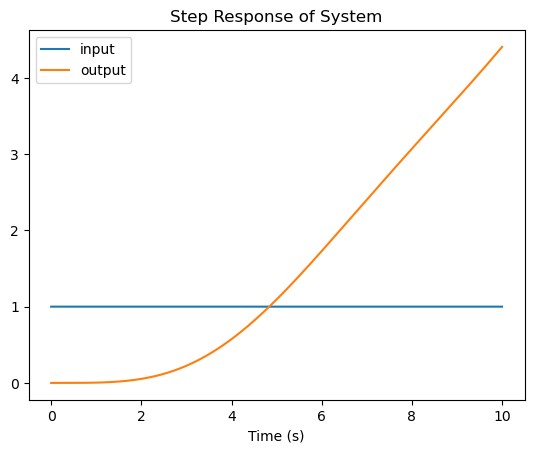

In [1]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import enel441_utilities as eu
import math

# set system parameters
J1 = 2
J2 = 5
k = 1
b = 0.5

# transfer function numerator and denominator (from equations)
num_sys = np.array([1])
den_sys = np.array([J1*J2/k, (J1+J2)*b/k, (J1+J2+b**2/k), 2*b, 0])

# generate step response
N = 10000
dt = 1/1000
t = np.linspace(0,dt*N,N)
u = np.ones((N))
tout, yout, xout = sp.signal.lsim((num_sys,den_sys),U=u,T=t)
#tout,yout = sp.signal.step((B,A))

fig, ax = plt.subplots(1,1)
ax.plot(t,u, label='input')
ax.plot(tout, yout, label='output')
ax.set_title('Step Response of System')
ax.set_xlabel('Time (s)')
plt.legend()
plt.show()

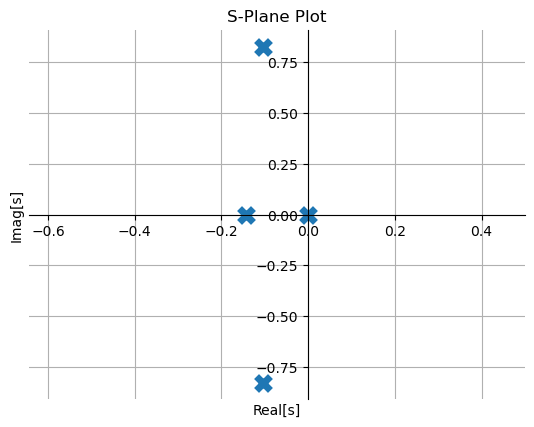

In [2]:
import enel441_utilities as eu
import importlib

importlib.reload(eu)

fig, ax = eu.enel441_s_plane_plot(num_sys,den_sys)


# State-Space representation of the 2-Disk system

Start with the two second-order differential equations:
$$
\begin{align*}
J_1 \frac{\text{d}^2 \theta_1}{\text{dt}^2} + b_1 \frac{\text{d}\theta_1}{\text{dt}} + k\theta_1 - k\theta_2 - T_M &= 0
\end{align*}
$$
and
$$
\begin{align*}
J_2 \frac{\text{d}^2 \theta_2}{\text{dt}^2} + b_2 \frac{\text{d}\theta_2}{\text{dt}} - k\theta_1 + k\theta_2 &= 0
\end{align*}
$$

Choose the following states:
- $x_1 = \theta_1$,
- $x_2 = \frac{\text{d}\theta_1}{\text{dt}}$,
- $x_3 = \theta_2$,
- $x_4 = \frac{\text{d} \theta_2}{\text{dt}}$.

Put them in a vector:
$$
\begin{align*}
x = \begin{bmatrix} x_1 \\ x_2 \\ x_3 \\ x_4 \end{bmatrix} =
\begin{bmatrix} \theta_1 \\ \frac{\text{d}\theta_1}{\text{dt}} \\ \theta_2 \\
\frac{\text{d} \theta_2}{\text{dt}} \end{bmatrix}  
\end{align*}
$$

We want to find an expression of the form:
$$
\begin{align*}
\frac{\text{d}x}{\text{dt}} = A x + B u
\end{align*}
$$




# In Class Activity
Re-write the differential equations in terms of the states.

Hint #1:
- The expression for $\frac{\text{d}x}{\text{dt}}$ is:
$$
\begin{align*}
\frac{\text{d}x}{\text{dt}} = \begin{bmatrix} \frac{\text{d}x_1}{\text{dt}} \\ \frac{\text{d}x_2}{\text{dt}} \\ \frac{\text{d}x_3}{\text{dt}} \\ \frac{\text{d}x_4}{\text{dt}} \end{bmatrix} = 
 \begin{bmatrix} \frac{\text{d}\theta_1}{\text{dt}} \\ \frac{\text{d}^2\theta_1}{\text{dt}^2} \\ \frac{\text{d} \theta_2}{\text{dt}} \\
\frac{\text{d}^2 \theta_2}{\text{dt}^2} \end{bmatrix}
\end{align*}
$$

Hint #2: Starting with the two differential equations, substitute derivatives with states:
- $\theta_1 = x_1$,
- $\frac{\text{d}\theta_1}{\text{dt}} = x_2$,
- $\theta_2 = x_3$,
- $\frac{\text{d} \theta_2}{\text{dt}} = x_4$.

Hint #3: The input for this system is the motor torque, so $u(t) = T_M(t)$.


Procedure: we need to find expressions for each of the terms in 
$$
\begin{align*}
\frac{\text{d}x}{\text{dt}} = \begin{bmatrix} \frac{\text{d}x_1}{\text{dt}} \\ \frac{\text{d}x_2}{\text{dt}} \\ \frac{\text{d}x_3}{\text{dt}} \\ \frac{\text{d}x_4}{\text{dt}} \end{bmatrix} = 
 \begin{bmatrix} \frac{\text{d}\theta_1}{\text{dt}} \\ \frac{\text{d}^2\theta_1}{\text{dt}^2} \\ \frac{\text{d} \theta_2}{\text{dt}} \\
\frac{\text{d}^2 \theta_2}{\text{dt}^2} \end{bmatrix}
\end{align*}
$$
in terms of the states $x_1$, $x_2$, $x_3$, $x_4$. Recall that the states are defined as:
$$
\begin{align*}
x = \begin{bmatrix} x_1 \\ x_2 \\ x_3 \\ x_4 \end{bmatrix} =
\begin{bmatrix} \theta_1 \\ \frac{\text{d}\theta_1}{\text{dt}} \\ \theta_2 \\
\frac{\text{d} \theta_2}{\text{dt}} \end{bmatrix}  
\end{align*}
$$

Let's find the expressions line by line.

# Start with the first element. 

Need to find an expression for $\frac{\text{d}x_1}{\text{dt}}$:
$$
\begin{align*}
\frac{\text{d}x_1}{\text{dt}} = \frac{\text{d}\theta_1}{\text{dt}} = x_2
\end{align*}
$$
The last equality follows by definition of the states.

# Second element

Need to find an expression for $\frac{\text{d}x_2}{\text{dt}}$:
$$
\begin{align*}
\frac{\text{d}x_2}{\text{dt}} = \frac{\text{d}^2\theta_1}{\text{dt}^2} 
\end{align*}
$$
Using the equation of Disk 1, we have an expression for $\frac{\text{d}^2\theta_1}{\text{dt}^2}$. 
$$
\begin{align*}
J_1 \frac{\text{d}^2 \theta_1}{\text{dt}^2} + b_1 \frac{\text{d}\theta_1}{\text{dt}} + k\theta_1 - k\theta_2 - T_M &= 0 
\end{align*}
$$
Re-arrange:
$$
\begin{align*}
\frac{\text{d}^2 \theta_1}{\text{dt}^2} = - \frac{b_1}{J_1} \frac{\text{d}\theta_1}{\text{dt}} - \frac{k}{J_1} \theta_1 + \frac{k}{J_1}\theta_2 + \frac{1}{J_1} T_M 
\end{align*}
$$
Substitute definitions of states:
$$
\begin{align*}
\frac{\text{d}x_2}{dt} = - \frac{k}{J_1} x_1 - \frac{b_1}{J_1} x_2 + \frac{k}{J_1} x_3 + \frac{1}{J_1} u
\end{align*}
$$

# Third element. 

Need to find an expression for $\frac{\text{d}x_3}{\text{dt}}$:
$$
\begin{align*}
\frac{\text{d}x_3}{\text{dt}} = \frac{\text{d}\theta_2}{\text{dt}} = x_4
\end{align*}
$$
The last equality follows by definition of the states.

# Fourth element
Need to find an expression for $\frac{\text{d}x_4}{\text{dt}}$:
$$
\begin{align*}
\frac{\text{d}x_4}{\text{dt}} = \frac{\text{d}^2\theta_2}{\text{dt}^2} 
\end{align*}
$$
Using the equation of Disk 2, we have an expression for $\frac{\text{d}^2\theta_2}{\text{dt}^2}$. 
$$
\begin{align*}
J_2 \frac{\text{d}^2 \theta_2}{\text{dt}^2} + b_2 \frac{\text{d}\theta_2}{\text{dt}} - k\theta_1 + k\theta_2 &= 0 
\end{align*}
$$
Rearrange:
$$
\begin{align*}
\frac{\text{d}^2 \theta_2}{\text{dt}^2} = -\frac{b_2}{J_2} \frac{\text{d}\theta_2}{\text{dt}} + \frac{k}{J_2} \theta_1 - \frac{k}{J_2} \theta_2
\end{align*}
$$
Substitute definitions of states:
$$
\begin{align*}
\frac{\text{d} x_4}{\text{dt}} =  \frac{k}{J_2} x_1 - \frac{k}{J_2} x_3  - \frac{b_2}{J_2} x_4  
\end{align*}
$$

# Put it all together

Now we can put together all the equations into the expression for $\frac{\text{d}x}{\text{dt}}$:
$$
\begin{align*}
\frac{\text{d}x}{\text{dt}} &= \begin{bmatrix} \frac{\text{d}x_1}{\text{dt}} \\ \frac{\text{d}x_2}{\text{dt}} \\ \frac{\text{d}x_3}{\text{dt}} \\ \frac{\text{d}x_4}{\text{dt}} \end{bmatrix} = \begin{bmatrix} x_2 \\ - \frac{k}{J_1} x_1 - \frac{b_1}{J_1} x_2 + \frac{k}{J_1} x_3 + u \\ x_4 \\ \frac{k}{J_2} x_1 - \frac{k}{J_2} x_3  - \frac{b_2}{J_2} x_4 \end{bmatrix} \\
&= \begin{bmatrix} 
0 & 1 & 0 & 0 \\ 
- \frac{k}{J_1} & - \frac{b_1}{J_1} & \frac{k}{J_1} & 0 \\
0 & 0 & 0 & 1 \\
\frac{k}{J_2} & 0 & \frac{k}{J_2} & - \frac{b_2}{J_2}
\end{bmatrix}
\begin{bmatrix} x_1 \\ x_2 \\ x_3 \\ x_4 \end{bmatrix} +
\begin{bmatrix} 0 \\ \frac{1}{J_1} \\ 0 \\ 0 \end{bmatrix} u
\end{align*}
$$

This is the first half of the state space representation! So far we have:
$$
\begin{align*}
A &= \begin{bmatrix}
0 & 1 & 0 & 0 \\ 
- \frac{k}{J_1} & - \frac{b_1}{J_1} & \frac{k}{J_1} & 0 \\
0 & 0 & 0 & 1 \\
\frac{k}{J_2} & 0 & -\frac{k}{J_2} & - \frac{b_2}{J_2}
\end{bmatrix} \\
B &= \begin{bmatrix} 0 \\ \frac{1}{J_1} \\ 0 \\ 0 \end{bmatrix}
\end{align*}
$$

Now we need to derive the second half of the state-space representation:
$$
\begin{align*}
y(t) = Cx(t) + D u(t)
\end{align*}
$$

Note that $y(t) = \theta_2(t)$ and $\theta_2$ is one of the states! 

So we have:
$$
\begin{align*}
y = \theta_2 = x_3 
\end{align*}
$$

In matrix form:
$$
\begin{align*}
y = \begin{bmatrix} 0 & 0 & 1 & 0 \end{bmatrix}
\begin{bmatrix} x_1 \\ x_2 \\ x_3 \\ x_4 \end{bmatrix}
\end{align*}
$$

We have completed our state-space representation of the 2-Disk system!
$$
\begin{align*}
A &= \begin{bmatrix}
0 & 1 & 0 & 0 \\ 
- \frac{k}{J_1} & - \frac{b_1}{J_1} & \frac{k}{J_1} & 0 \\
0 & 0 & 0 & 1 \\
\frac{k}{J_2} & 0 & \frac{k}{J_2} & - \frac{b_2}{J_2}
\end{bmatrix} \\
B &= \begin{bmatrix} 0 \\ \frac{1}{J_1} \\ 0 \\ 0 \end{bmatrix} \\
C &= \begin{bmatrix} 0 & 0 & 1 & 0 \end{bmatrix} \\
D &= 0
\end{align*}
$$

# Comment

We did not do anything very special, just re-organizing, re-labelling and gathering of the variables in the equations.


# In Class Activity

Compare the poles of the transfer function we calculated earlier and the eigenvalues of the A matrix.

In [4]:
# set system parameters
J1 = 2
J2 = 10
k = 1
b = 0.5

# define state space matrices
A = np.array([[0, 1, 0, 0], [-k/J1, -b/J1, k/J1, 0], [0, 0, 0, 1], [k/J2, 0, -k/J2, -b/J2]]) 
B = np.array([[0], [1/J1], [0], [0]])
C = np.array([[0, 0, 1, 0]])
D = 0

# eigenvalue decomposition of A matrix
Lambda, T = np.linalg.eig(A)

den_sys = np.array([J1*J2/k, (J1+J2)*b/k, (J1+J2+b**2/k), 2*b, 0])
# compare eigenvalues with roots calculated earlier
#den_sys = fill me in
print('Roots calculated from transfer function:', np.roots(den_sys))
np.set_printoptions(precision=2, suppress=True)
print('Eigenvalues of the A matrix', Lambda)

Roots calculated from transfer function: [-0.11+0.76j -0.11-0.76j -0.08+0.j    0.  +0.j  ]
Eigenvalues of the A matrix [-0.11+0.76j -0.11-0.76j -0.  +0.j   -0.08+0.j  ]


# In Class Activity

Calculate the response due to initial conditions.

Note that because of the way that we derived the state space representation, the initial conditions make physical sense. Look back at the transfer function we wrote down, what can we say about the initial conditions in that case?

In [ ]:


# verfiy that the matrix T diagonalizes A
print(np.linalg.inv(T) @ A @ T)

# transform system matrices so that the A matrix is diagonal
A_tilde = np.linalg.inv(T) @ A @ T
B_tilde = np.linalg.inv(T) @ B
C_tilde = C @ T
D_tilde = D

# Calculate response to initial conditions

# initial condition
x_initial = np.array([[1], [0], [-0.5], [0]])
x_tilde_initial = np.linalg.inv(T) @ x_initial

# generate data
N = 10000
dt = 1/100
t = np.linspace(0,dt*N,N)
y = np.zeros(N, dtype=np.csingle)
ii = 0
for pp in Lambda:
    y += C_tilde[0,ii] * np.exp(pp*t) * x_tilde_initial[ii,0]
    ii += 1
   
fig, ax = plt.subplots(1,1)
ax.plot(t, np.real(y), label='output')
ax.set_title('Response of System Due to Initial Conditions')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Angle')

plt.show()

# In Class Activity

Plot the response of the 2-disk system to various inputs.

In [ ]:
# set system parameters
J1 = 2
J2 = 10
k = 1
b = 0.5

# define state space matrices
A = np.array([[0, 1, 0, 0], [-k/J1, -b/J1, k/J1, 0], [0, 0, 0, 1], [k/J2, 0, -k/J2, -b/J2]]) 
B = np.array([[0], [1/J1], [0], [0]])
C = np.array([[0, 0, 1, 0]])
D = 0

# make a step input
u_step = np.ones((N))

# make a rectangular pulse input
n_pulse = 1000     #width of pulse in number of steps of size dt
u_pulse = np.zeros(N)
u_pulse[0:n_pulse] = np.ones((n_pulse))

# make an input that is a single sinusoid
f = 0.1   #frequency of sinusoid
theta = 0 #math.pi/6
u_sinusoid = np.sin(2*math.pi*f*t + theta)

# make an input that is random
u_rand = np.random.randn(N)

# simulate the system output for selected input signal (note initial conditions are assumed to be zero)
u = u_sinusoid
N = 10000
dt = 1/100
t = np.linspace(0,dt*N,N)
tout, yout, xout = sp.signal.lsim((A, B, C, D),U=u,T=t)

# plot the response
fig, ax = plt.subplots(1,1)
ax.plot(t, u, label='input')
ax.plot(tout, yout, label='output')
ax.set_title('Response of System')
ax.set_xlabel('Time (s)')
ax.set_ylabel( 'Angle' )
plt.show()